In [393]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import exponweib
from tqdm import tqdm


In [394]:
print("\nTarea Semana 13 Métodos Computacionales 1")

# 1.1.1
print("\n1.1.1 Binomial")

url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/BinomialCoins.csv"
data = pd.read_csv(url)


Errores=np.array(data["NCaras"])
ObsFreq=np.array(data["ObsFreq"])

NMonedas = 5
NLanzamientos = 1000


# a

media = 0

for i in range(len(Errores)):
    media+=Errores[i]*(ObsFreq[i]/NLanzamientos)

p = media/NMonedas # media = np
print("\na)")
print(f"El parametro p de la distribución es: {p}")


# b

prob_caras=[]
n = NMonedas
for x in Errores:
    C = np.math.factorial(n)/(np.math.factorial(x)*np.math.factorial(n-x))  
    Prob = C * (p**x) * (1-p)**(NMonedas-x)
    prob_caras.append(Prob)

print("\nb)")   
for i in range(len(prob_caras)):
    print(f"La probabilidad de obtener {Errores[i]} caras en un experimento es: {round(prob_caras[i],4)}")


# c
    
ExpFreq = []
for i in range(len(Errores)):
    freq = prob_caras[i]*NLanzamientos
    ExpFreq.append(freq)

print("\nc)")
for i in range(len(Errores)):
    print(f"La frecuencia esperada para {Errores[i]} caras es: {round(ExpFreq[i])}")



Tarea Semana 13 Métodos Computacionales 1

1.1.1 Binomial

a)
El parametro p de la distribución es: 0.49460000000000004

b)
La probabilidad de obtener 0 caras en un experimento es: 0.033
La probabilidad de obtener 1 caras en un experimento es: 0.1613
La probabilidad de obtener 2 caras en un experimento es: 0.3158
La probabilidad de obtener 3 caras en un experimento es: 0.3091
La probabilidad de obtener 4 caras en un experimento es: 0.1512
La probabilidad de obtener 5 caras en un experimento es: 0.0296

c)
La frecuencia esperada para 0 caras es: 33
La frecuencia esperada para 1 caras es: 161
La frecuencia esperada para 2 caras es: 316
La frecuencia esperada para 3 caras es: 309
La frecuencia esperada para 4 caras es: 151
La frecuencia esperada para 5 caras es: 30



d)


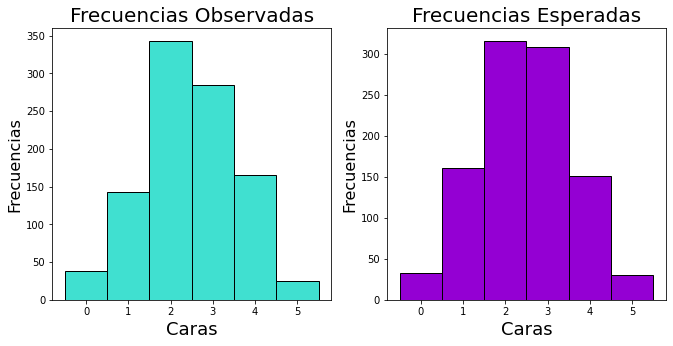

In [395]:
# d

L=[]
for i in range(len(Errores)):
    for j in range(ObsFreq[i]):
        L.append(Errores[i])

x = np.linspace(0,6,7)
h, bins = np.histogram(L, bins=x, density=False)

w = np.diff(bins)
fig = plt.figure(figsize=(11,5))


ax = fig.add_subplot(1,2,1)
ax.bar( bins[:-1], h, color='turquoise', width=w, ec='k' )
ax.set_title('Frecuencias Observadas', fontsize=20,)
ax.set_xlabel('Caras', fontsize=18)
ax.set_ylabel('Frecuencias', fontsize=16)
#plt.show()

L2=[]

nb=[]
for i in range(len(ExpFreq)):
    nb.append(int(round(ExpFreq[i],0)))
   
for i in range(len(Errores)):
    for j in range(nb[i]):
        L2.append(Errores[i])

x = np.linspace(0,6,7)
h, bins = np.histogram(L2, bins=x, density=False)
w = np.diff(bins)
ax1 = fig.add_subplot(1,2,2)
ax1.bar( bins[:-1], h, color='darkviolet', width=w, ec='k' )
ax1.set_title('Frecuencias Esperadas', fontsize=20)
ax1.set_xlabel('Caras', fontsize=18)
ax1.set_ylabel('Frecuencias', fontsize=16)

print("\nd)")

In [396]:
# e

sum_chi = 0
for i in range(len(Errores)):
    r = ((ObsFreq[i]-ExpFreq[i])**2)/ExpFreq[i] 
    sum_chi += r

print("\ne)")
print(f"El estadístico de prueba chi cuadrado es: {round(sum_chi,2)}")

df = 4
prob = chi2.cdf(sum_chi, df = df)
pvalue = 1 - prob
print("\nf)")
print(f'El P value para estas distribuciones es: {pvalue}')

upper = chi2.ppf(0.95, df=df)
print("\ng)")
print(f"El valor critico de la disrtribución chi2 es: {upper}")

print("\nh,i)")
#print("En conclusión, se calculo el Pvalue este dio bastante pequeño lo cual nos lleva a dudar de la hipotesis nula, sin embargo, tambien se realizo la prueba de hipotesis X2 y como este calculo no supera el valor critico se puede decir que no se rechaza la hipótesis nula. Es decir, la secuencia de datos sigue una distribución binomial.")
print("En conclusión, como el estadístico de prueba es menor que el valor crítico, no se rechaza la hipótesis nula.")
print("Es decir, los datos siguen una distribución binomial con un nivel de confianza de 95%")



e)
El estadístico de prueba chi cuadrado es: 9.23

f)
El P value para estas distribuciones es: 0.05571072544279565

g)
El valor critico de la disrtribución chi2 es: 9.487729036781154

h,i)
En conclusión, como el estadístico de prueba es menor que el valor crítico, no se rechaza la hipótesis nula.
Es decir, los datos siguen una distribución binomial con un nivel de confianza de 95%


In [397]:
# 1.1.2
print("\n1.1.2 Poisson")

url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/PoissonCars.csv"
data = pd.read_csv(url)

Errores=np.array(data["Errores"])
ObsFreq=np.array(data["ObsFreq"])

NMotos = 440

# a

media = 0

for i in range(len(Errores)):
    media+=Errores[i]*(ObsFreq[i]/NMotos)

lamda = media
print("\na)")
print(f"El paránetro λ de la distribución es: {round(lamda,3)}")


# b

prob_caras=[]

for k in Errores:
    prob = np.exp(-lamda) * lamda**k / np.math.factorial(k)  
    prob_caras.append(prob)

print("\nb)")    
for i in range(len(prob_caras)):
    print(f" La probabilidad de obtener {Errores[i]} fallos en una moto es: {round(prob_caras[i],5)}")
    
# c

ExpFreq=[]
for i in range(len(Errores)):
    freq = prob_caras[i]*NMotos
    ExpFreq.append(freq)

print("\nc)")
for i in range(len(Errores)):
    print(f"La frecuencia esperada para {Errores[i]} errores es: {ExpFreq[i]}")


1.1.2 Poisson

a)
El paránetro λ de la distribución es: 3.048

b)
 La probabilidad de obtener 0 fallos en una moto es: 0.04747
 La probabilidad de obtener 1 fallos en una moto es: 0.14467
 La probabilidad de obtener 2 fallos en una moto es: 0.22045
 La probabilidad de obtener 3 fallos en una moto es: 0.22396
 La probabilidad de obtener 4 fallos en una moto es: 0.17064
 La probabilidad de obtener 5 fallos en una moto es: 0.10401
 La probabilidad de obtener 6 fallos en una moto es: 0.05283
 La probabilidad de obtener 7 fallos en una moto es: 0.023
 La probabilidad de obtener 8 fallos en una moto es: 0.00876
 La probabilidad de obtener 9 fallos en una moto es: 0.00297

c)
La frecuencia esperada para 0 errores es: 20.88533951424627
La frecuencia esperada para 1 errores es: 63.65281883773694
La frecuencia esperada para 2 errores es: 96.9982159788696
La frecuencia esperada para 3 errores es: 98.54136941489709
La frecuencia esperada para 4 errores es: 75.08180476441878
La frecuencia esperada


d)


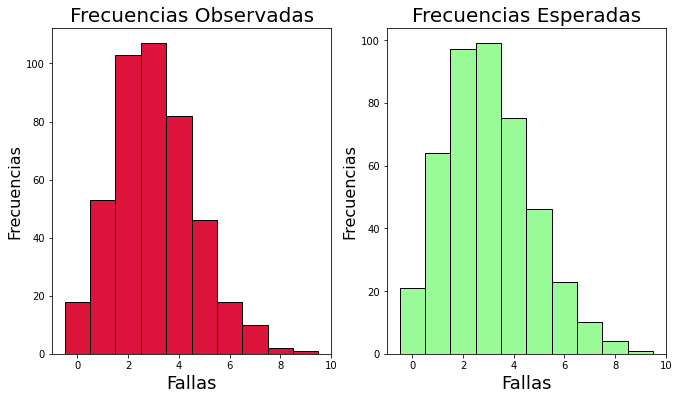

In [398]:
# d

L=[]
for i in range(len(Errores)):
    for j in range(ObsFreq[i]):
        L.append(Errores[i])

x = np.linspace(0,10,11)
h, bins = np.histogram(L, bins=x, density=False)
w = np.diff(bins)

fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1,2,1)
ax.bar( bins[:-1], h, color='crimson', width=w, ec='k' )
ax.set_title('Frecuencias Observadas', fontsize=20)
ax.set_xlabel('Fallas', fontsize=18)
ax.set_ylabel('Frecuencias', fontsize=16)

L2=[]

nb=[]
for i in range(len(ExpFreq)):
    nb.append(int(round(ExpFreq[i],0)))
   
for i in range(len(Errores)):
    for j in range(nb[i]):
        L2.append(Errores[i])

x = np.linspace(0,10,11)
h, bins = np.histogram(L2, bins=x, density=False)
w = np.diff(bins)
ax1 = fig.add_subplot(1,2,2)
ax1.bar( bins[:-1], h, color='palegreen', width=w, ec='k' )
ax1.set_title('Frecuencias Esperadas', fontsize=20)
ax1.set_xlabel('Fallas', fontsize=18)
ax1.set_ylabel('Frecuencias', fontsize=16)

print("\nd)")

In [399]:
# e

sum_chi = 0
for i in range(len(Errores)):
    r = ((ObsFreq[i]-ExpFreq[i])**2)/ExpFreq[i] 
    sum_chi += r

print("\ne)")
print(f" El valor del estadístico de prueba chi cuadrado es: {round(sum_chi,2)}")


# f

gl=8
prob = chi2.cdf(sum_chi,df = gl)
pvalue = 1 - prob
print("\nf)")
print(f' El p-value para estas distribuciones es: {pvalue}')


# g

upper = chi2.ppf(0.95, df=gl)
print("\ng)")
print(f"El valor crítico de la distribución chi cuadrado es: {upper}")

# h, i

print("\nh, i)")
print("En conclusión, como el estadístico de prueba es menor que el valor crítico, no se rechaza la hipótesis nula.")
print("Es decir, los datos siguen una distribución de poisson con un nivel de confianza de 95%")



e)
 El valor del estadístico de prueba chi cuadrado es: 6.07

f)
 El p-value para estas distribuciones es: 0.6395980762702841

g)
El valor crítico de la distribución chi cuadrado es: 15.50731305586545

h, i)
En conclusión, como el estadístico de prueba es menor que el valor crítico, no se rechaza la hipótesis nula.
Es decir, los datos siguen una distribución de poisson con un nivel de confianza de 95%


In [400]:
# 1.1.3
print("\n1.1.3 Problema modelo")

def Actualizar_posc(theta: float, x: float, y: float):
    lstep=0.4
    x += lstep * np.cos(theta)
    y += lstep * np.sin(theta)
    
    return x,y


def experimento()->int:
    #ang = np.random.uniform( 0,2*np.pi, size = 3000 )
    x=0
    y=0
    pasos=0
    while (x<=2.5 and y<=2.5 and x>= -2.5 and y>=-2.5):
        ang = np.random.uniform( 0 , 2*np.pi)
        x,y =Actualizar_posc(ang,x,y)
        pasos+=1
    return pasos


p=[]
NSteps = 200
for i in range(NSteps):
    p.append(experimento())
print(p)

min_ = np.min(p)
max_ = np.max(p)
h = 15


1.1.3 Problema modelo
[31, 18, 37, 20, 36, 15, 24, 120, 14, 28, 14, 25, 19, 80, 41, 95, 55, 124, 54, 55, 55, 46, 68, 108, 21, 22, 42, 71, 28, 34, 21, 36, 32, 32, 59, 20, 49, 73, 48, 17, 26, 24, 110, 20, 38, 20, 62, 47, 55, 45, 28, 96, 19, 59, 107, 33, 23, 46, 19, 44, 26, 135, 33, 37, 45, 68, 38, 70, 28, 52, 44, 99, 19, 38, 17, 54, 15, 32, 46, 16, 71, 34, 10, 34, 45, 41, 19, 38, 18, 43, 48, 18, 69, 33, 56, 160, 37, 48, 24, 26, 36, 19, 12, 27, 62, 78, 31, 18, 27, 74, 25, 26, 71, 23, 28, 74, 46, 60, 136, 37, 72, 44, 15, 42, 36, 85, 25, 65, 69, 15, 53, 53, 68, 24, 63, 24, 73, 12, 67, 34, 84, 28, 65, 20, 75, 30, 29, 40, 23, 27, 42, 16, 52, 46, 98, 123, 15, 127, 59, 78, 53, 57, 19, 30, 51, 71, 31, 61, 95, 29, 86, 30, 54, 28, 17, 28, 54, 55, 53, 130, 24, 27, 104, 157, 58, 28, 62, 60, 31, 101, 35, 64, 48, 46, 22, 37, 42, 22, 23, 33]


a=2.2725310111665395, b=0.9044408437272156, c=9.28614504582223, d=22.03086387107497
El valor medio de pasos según el ajuste de SciPy es 47.36748934377762


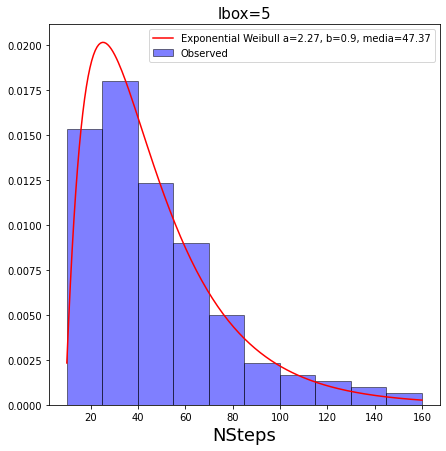

In [401]:
# a

bins = np.arange(min_,max_+h,h)


# b - d

#hcopy,_ = np.histogram(p, bins=bins, density=False)
#h, bins1 = np.histogram(p, bins=bins, density=True)
h, bins1 = np.histogram(p, bins=bins, density=False)

w = np.diff(bins1)


H1Norm = h / np.sum(h*w)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.bar( bins1[:-1]+0.5*w[0], H1Norm, color='b',  alpha=0.5, width=w, ec='k', label = 'Observed')


a,b,c,d = exponweib.fit(p) 
media = exponweib.mean(a,b,c,d)
print(f'a={a}, b={b}, c={c}, d={d}')
# a = param. exponencial, b = potencia a la que se eleva, media, desv. est.
x = np.linspace(min_, max_, 201)
y = exponweib.pdf(x,a,b,c,d) # cambiar a weibull
ax.plot(x, y, c='red',
         label = f'Exponential Weibull a={round(a,2)}, b={round(b,2)}, media={round(media,2)}')
    
ax.set_title('lbox=5', fontsize=15)
ax.legend()
plt.xlabel('NSteps', fontsize=18)
#plt.ylabel('Frecuencias', fontsize=16)


# c

H1Norm = h / np.sum(h*w)


# e

mean = exponweib.mean(a,b,c,d)
print(f"El valor medio de pasos según el ajuste de SciPy es {mean}")


200
10


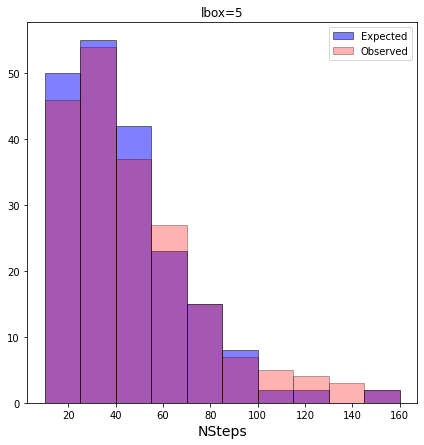

In [402]:
# Expected (Esperado)
ExpFreq = []
for i in range(NSteps):
    ExpFreq.append(exponweib.rvs(a,b,c,d))
    
print(len(ExpFreq))
h2, bins2 = np.histogram(ExpFreq, bins = bins)
print(len(h2))

fig = plt.figure(figsize=(7,7))
ax2 = fig.add_subplot()
ax2.bar(bins1[:-1]+0.5*w[0], h2, alpha = 0.5, width = w, color = 'b',edgecolor='black', label='Expected')
ax2.bar(bins1[:-1]+0.5*w[0], h, alpha = 0.3, width = w, color = 'r', edgecolor='black', label='Observed')
ax2.set_xlabel('NSteps',size=14)
ax2.set_title('lbox=5')
ax2.legend()


In [403]:
# f

EP = 0
NClases = 0

for i, j in zip(h, h2):
    print(i,j)
    if i > 5 and j > 5: 
        NClases += 1
        r = ((i-j)**2)/j 
        EP += r


print(f"g) El estadístico de prueba chi2 es: {round(EP,2)}")

df = NClases-1-1
prob = chi2.cdf(EP, df = df)
pvalue = 1 - prob

upper = chi2.ppf(0.95, df = df)
print(f"h) El valor crítico de la distribución chi2 con una significancia del 0.05 es: {upper}")


conclusion1a = "Como el estadístico de prueba es menor que el valor crítico, no rechazamos la hipótesis nula"
conclusion1b = "Se concluye que los datos siguen una distribución Weibull exponencial con un nivel de confianza del 95%"

conclusion2a = "Como el estadístico de prueba es mayor que el valor crítico, rechazamos la hipótesis nula"
conclusion2b = "Se concluye que los datos no siguen una distribución Weibull exponencial con un nivel de confianza del 95%"

if (EP < upper):
    print(f"i) {conclusion1a}")
    print(f"j) {conclusion1b}")
else:
    print(f"i) {conclusion2a}")
    print(f"j) {conclusion2b}")
    
    

46 50
54 55
37 42
27 23
15 15
7 8
5 2
4 2
3 0
2 2
g) El estadístico de prueba chi2 es: 1.75
h) El valor crítico de la distribución chi2 con una significancia del 0.05 es: 9.487729036781154
i) Como el estadístico de prueba es menor que el valor crítico, no rechazamos la hipótesis nula
j) Se concluye que los datos siguen una distribución Weibull exponencial con un nivel de confianza del 95%
